In [24]:
import scipy as sp  #scientific computer package
import numpy as np   #math and array package
from numpy import exp, sqrt, pi, log, array   #math functions
import matplotlib.pyplot as plt  #plotting package
import seaborn as sns   #plotting style package

from openpyxl import load_workbook  #excel interface package

import pandas as pd

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from sklearn.decomposition import PCA
import sklearn.preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
from scipy import optimize
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# TRI data - upload
dvs_data = pd.read_excel('./Updated_HydrationData.xlsx', sheet_name='HydrationData_Verified',
                        usecols = 'A:R')   #importing experimental data

c:\Users\andyt\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
c:\Users\andyt\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


In [27]:
df = dvs_data#[dvs_data['LV_id'] == 0] #vapor data only
df=df[df.Thickness.notna()] #drop all data from Pineri study (missing thickness)
df=df[df.Temperature.notna()]
column_list=['Drying_Temp','Temperature','RH','lambda']
#Scale Data
scaled_df=df.copy()
scaler=StandardScaler()
scaler.fit(df[["RH"]])

for col in column_list:
    scaler.fit(df[[col]])
    scaled_df[col]=scaler.transform(array(df[col]).reshape(-1,1))


In [28]:
num_cluster = 4
km=KMeans(n_clusters=num_cluster) 
column_list=['Temperature','RH','lambda']
cluster_label_lst=km.fit_predict(scaled_df[column_list])

df['Cluster']=cluster_label_lst;  # assignes sorted clusters to original df (ascending order)

#sns.scatterplot(scaled_df.ChemPotential,scaled_df['lambda'], hue = scaled_df['Cluster'],palette=sns.color_palette('tab10',n_colors=4))




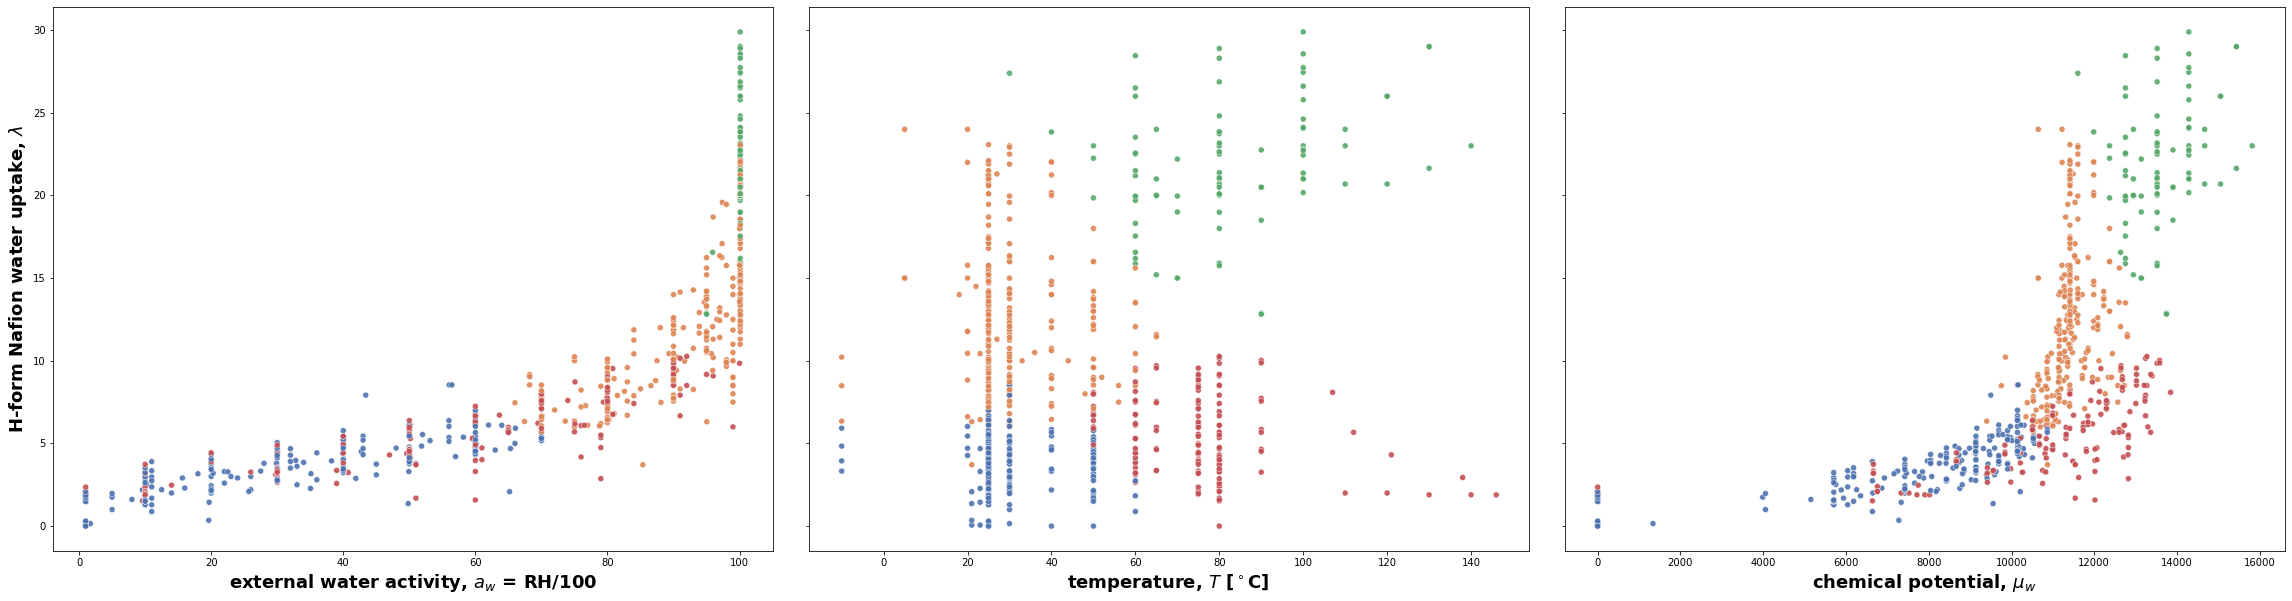

In [54]:

plot_size = 10
fig,axes=plt.subplots(1,3,figsize=(4*plot_size, 1*plot_size), sharey=True)
plt.subplots_adjust(wspace=0.05)
plt.subplot(1,3,1)
sns.scatterplot(df.RH,df['lambda'], hue = df['Cluster'],palette=sns.color_palette('deep',n_colors=num_cluster),alpha=0.9)
plt.xlabel('external water activity, $a_w$ = RH/100',weight="bold",fontsize=18)
plt.ylabel('H-form Nafion water uptake, $\lambda$',weight="bold",fontsize=18)
plt.legend(loc = 'upper left').set_visible(False)

plt.subplot(1,3,2)
sns.scatterplot(df.Temperature,df['lambda'], hue = df['Cluster'],palette=sns.color_palette('deep',n_colors=num_cluster),alpha=0.9)
plt.xlabel('temperature, $T$ [$^\circ$C] ',weight="bold",fontsize=18)
plt.legend(loc = 'upper left').set_visible(False)

plt.subplot(1,3,3)
sns.scatterplot(df.ChemPotential,df['lambda'], hue = df['Cluster'],palette=sns.color_palette('deep',n_colors=num_cluster),alpha=0.9)
plt.xlabel('chemical potential, $\mu_w$ ',weight="bold",fontsize=18)
plt.legend(loc = 'upper left').set_visible(False)
plt.savefig('Kmeans_RH_Temp_ChemPoten.png')


<AxesSubplot:xlabel='ChemPotential', ylabel='lambda'>

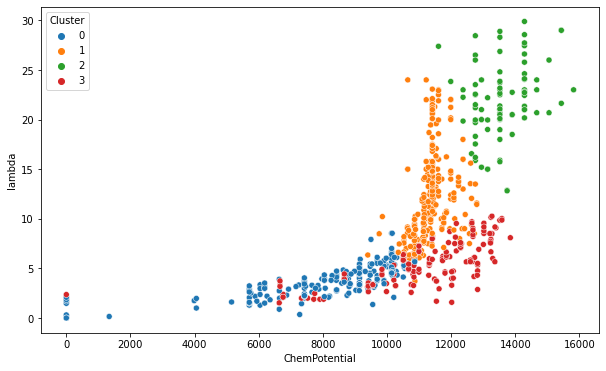

In [30]:
f=plt.figure(figsize=(10,6))
sns.scatterplot(df.ChemPotential,df['lambda'], hue = df['Cluster'],palette=sns.color_palette('tab10',n_colors=num_cluster))

In [6]:
km.cluster_centers_

array([[0.62551273, 0.47417044, 0.92939673, 0.24526075],
       [0.02951831, 0.3549586 , 0.85387109, 0.16404151],
       [0.15852707, 0.34908342, 0.25709407, 0.04261633]])

<AxesSubplot:xlabel='Temperature', ylabel='lambda'>

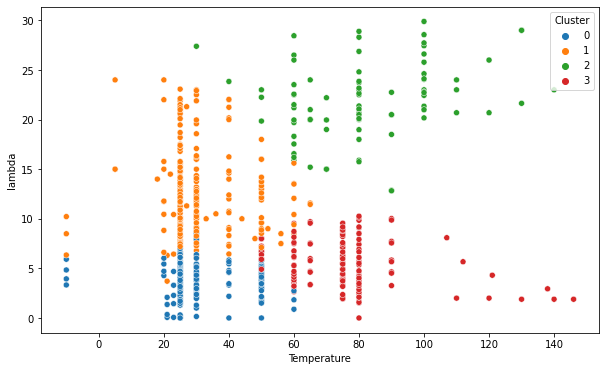

In [31]:
f=plt.figure(figsize=(10,6))

sns.scatterplot(df.Temperature,df['lambda'], hue = df['Cluster'],palette=sns.color_palette('tab10',n_colors=num_cluster))

In [32]:
# f=plt.figure(figsize=(10,6))

# sns.scatterplot(df.Drying_Temp,df['lambda'], hue = df['Cluster'],palette=sns.color_palette('tab10',n_colors=3))

Determine Optimal K for clustering (Elbow Method)

In [7]:
sse_lst=[]
for num_group in range (3,15):
    km=KMeans(n_clusters=num_group) 
    km.fit(scaled_df[['RH','lambda']])
    sse_lst.append(km.inertia_)
#sse_lst

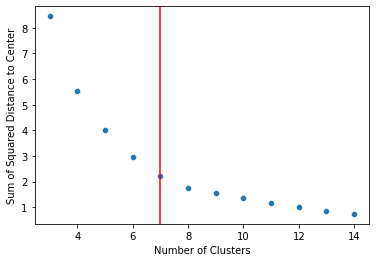

In [8]:
sns.scatterplot(np.arange(3,15),sse_lst)
plt.xlabel("Number of Clusters")
plt.ylabel("Sum of Squared Distance to Center")
plt.axvline(7,color='r')

In [9]:
range_n_clusters = [2, 3, 4, 5, 6,7,8,9]

for n in range_n_clusters:

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n, random_state=10)
    cluster_labels = km.fit_predict(scaled_df[['Temperature','lambda','RH','PT','Cast_id']])

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(scaled_df[['Temperature','lambda','RH','PT','Cast_id']], cluster_labels)
    
    print(
        "For n_clusters =",
        n,
        "The average silhouette_score is :",
        silhouette_avg,
    )

For n_clusters = 2 The average silhouette_score is : 0.42174389936292295
For n_clusters = 3 The average silhouette_score is : 0.4302420981552439
For n_clusters = 4 The average silhouette_score is : 0.4332302898866232
For n_clusters = 5 The average silhouette_score is : 0.42379007998585705
For n_clusters = 6 The average silhouette_score is : 0.42904627436825754
For n_clusters = 7 The average silhouette_score is : 0.4366816336818751
For n_clusters = 8 The average silhouette_score is : 0.42182079823033064
For n_clusters = 9 The average silhouette_score is : 0.422792644751958


In [ ]:
df.Drying_Temp.unique()

array([ 50,  80, 100, 120, 130, 140, 170,  25,  60, 150, 105, 123],
      dtype=int64)